In [2]:
from sunpy.net import Fido, attrs as a

/Users/bmmorris/anaconda/lib/python3.5/site-packages/glymur/config.py:171: UserWarning: Neither the openjp2 nor the openjpeg library could be loaded.  
  warnings.warn(msg)


RuntimeError: module compiled against API version 0xc but this version of numpy is 0xa

In [9]:
import astropy.units as u
# result = Fido.search(a.Time('2013/5/13 15:57', '2013/5/13 16:01'), a.Instrument('HMI'), a.vso.Physobs('intensity'))#, a.Wavelength(171*u.Angstrom)) 
result = Fido.search(a.Time('2013/5/13 15:55', '2013/5/13 15:56'), a.Instrument('HMI'), a.vso.Physobs('intensity'))#, a.Wavelength(171*u.Angstrom)) 

In [10]:
result

Start Time [1],End Time [1],Source,Instrument,Type,Wavelength [2]
,,,,,Angstrom
str19,str19,str3,str3,str8,float64
2013-05-13 15:55:22,2013-05-13 15:55:23,SDO,HMI,FULLDISK,6173.0 .. 6174.0


In [11]:
downloaded_files = Fido.fetch(result, path='data/.')

downloaded_files

[                                        ========================================


['data/./hmi_ic_45s_2013_05_13_15_56_15_tai_continuum.fits']

/Users/bmmorris/anaconda/lib/python3.5/site-packages/sunpy/map/mapbase.py:669: Warning: Missing metadata for heliographic longitude: assuming longitude of 0 degrees
  lon=self.heliographic_longitude,
/Users/bmmorris/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


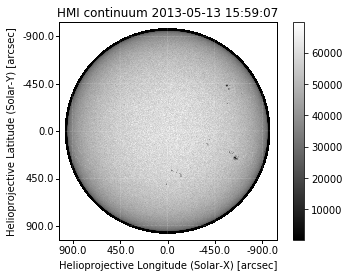

In [144]:
%matplotlib inline
import matplotlib.pyplot as plt

from astropy.io import fits
import sunpy.map 
m = sunpy.map.Map(downloaded_files[1])

m.peek()
plt.show()

/Users/bmmorris/anaconda/lib/python3.5/site-packages/sunpy/map/mapbase.py:669: Warning: Missing metadata for heliographic longitude: assuming longitude of 0 degrees
  lon=self.heliographic_longitude,
/Users/bmmorris/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


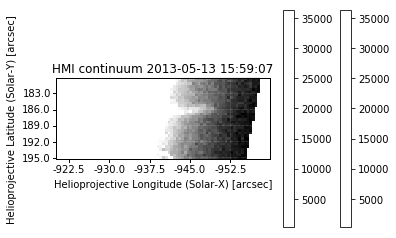

In [146]:
import numpy as np

plt.figure(figsize=(10, 10))

# plt.imshow(np.log(m.data), vmin=5.22, vmax=7, origin='lower', 
#            extent=[1000, -1000, 1000, -1000])
from astropy.coordinates import SkyCoord

# top_right = SkyCoord(920 * u.arcsec, -210 * u.arcsec, frame=m.coordinate_frame)
# bottom_left = SkyCoord(960 * u.arcsec, -140 * u.arcsec, frame=m.coordinate_frame)

top_right = SkyCoord(-920 * u.arcsec, 180 * u.arcsec, frame=m.coordinate_frame)
bottom_left = SkyCoord(-960 * u.arcsec, 195 * u.arcsec, frame=m.coordinate_frame)
swap_submap = m.submap(bottom_left, top_right)
swap_submap.peek()#draw_limb=True, draw_grid=True)
# plt.tight_layout(pad=1.00)
ax = plt.gca()
cbar = plt.colorbar()
# ax.set_([200, 500])
cbar.set_clim([250, 400])
plt.show()

In [152]:
swap_submap.world_to_pixel(SkyCoord(-940*u.arcsec, 186*u.arcsec, frame=swap_submap.coordinate_frame))

PixelPair(x=<Quantity 39.032213532633705 pix>, y=<Quantity 17.894557082113693 pix>)

In [153]:
m.world_to_pixel(SkyCoord(-940*u.arcsec, 186*u.arcsec, frame=m.coordinate_frame))

PixelPair(x=<Quantity 3904.0322135326337 pix>, y=<Quantity 1681.8945570821138 pix>)